In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [10]:
from tensorflow.keras.datasets import mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [11]:
single_image = X_train[0]

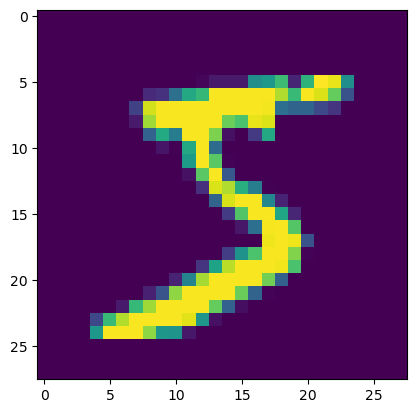

In [12]:
plt.imshow(single_image)

In [15]:
from tensorflow.keras.utils import to_categorical
y_example = to_categorical(y_train)
y_example.shape

(60000, 10)

In [16]:
y_cat_test = to_categorical(y_train, num_classes = 10)
y_cat_train = to_categorical(y_test, num_classes = 10)

In [18]:
X_train = X_train/255
X_test = X_test/255

In [22]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential()

model.add(Conv2D(32, (4,4), activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

c:\Users\madha\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 25, 25, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,786 (2.26 MB)

 Trainable params: 591,786 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
print(X_train.shape)  # Should print something like (60000, ...)
print(y_cat_train.shape)  # Should also print (60000, ...)
print(X_test.shape)  # Should match y_cat_test in the first dimension
print(y_cat_test.shape)


(60000, 28, 28, 1)
(10000, 10)
(10000, 28, 28, 1)
(60000, 10)


In [26]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_loss', patience = 1)

history = model.fit(X_train, y_cat_train, epochs = 10, validation_data = (X_test, y_cat_test), callbacks = [early_stop])

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 60000
'y' sizes: 10000
